In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#reads csv
salary_df = pd.read_csv('Salary_data.csv')

In [4]:
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:

Here are your LinearRegression class methods with comments explaining each line of the code:

python
Copy code
class LinearRegression:
    def __init__(self):
        # Initialize the slope (m) and intercept (c) to 0
        self.m = 0
        self.c = 0

    def train(self, X, Y):
        # Convert input lists to numpy arrays for easier mathematical operations
        X = np.array(X)
        Y = np.array(Y)
        
        # Calculate the means of X and Y
        x_mean = np.mean(X)
        y_mean = np.mean(Y)
        
        # Calculate the mean of the product of X and Y
        xy_mean = np.mean(X * Y)
        
        # Calculate the mean of the square of X
        x2_mean = np.mean(X ** 2)
        
        # Calculate the slope (m) using the linear regression formula
        self.m = (xy_mean - (x_mean * y_mean)) / (x2_mean - x_mean ** 2)
        
        # Calculate the intercept (c) using the linear regression formula
        self.c = y_mean - self.m * x_mean

    def print_weight(self):
        # Print the calculated slope and intercept
        print(f'{self.m} && {self.c}')

    def predict(self, X):
        # Predict the Y values for the given X values using the calculated slope and intercept
        return np.array(X) * self.m + self.c

    def mse(self, X, Y):
        # Calculate the Mean Squared Error (MSE) for the predictions
        y_pred = np.array(X) * self.m + self.c
        return np.sum((np.array(Y) - y_pred) ** 2) / Y.shape[0]

    def rmse(self, X, Y):
        # Calculate the Root Mean Squared Error (RMSE) for the predictions
        y_pred = np.array(X) * self.m + self.c
        return np.sqrt(np.sum((np.array(Y) - y_pred) ** 2) / Y.shape[0])



        
        

In [6]:
# Create an instance of the LinearRegression class
model = LinearRegression()

# Train the model using the 'YearsExperience' as the input (X) and 'Salary' as the output (Y)
# The train method will calculate and set the slope (m) and intercept (c) for the linear regression model
model.train(salary_df['YearsExperience'], salary_df['Salary'])

# Print the calculated slope (m) and intercept (c)
model.print_weight()


9449.962321455081 &&  25792.200198668666


In [7]:

# Predict the salary based on the 'YearsExperience'
model.predict(salary_df['YearsExperience'])

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [8]:
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


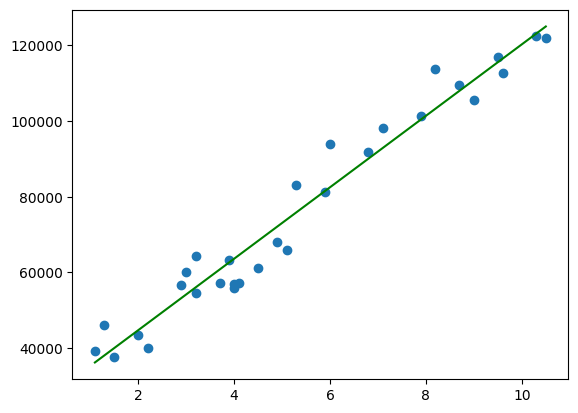

In [9]:
# Create a scatter plot of 'YearsExperience' vs. 'Salary'
plt.scatter(salary_df['YearsExperience'], salary_df['Salary'])
# Plot the regression line
# The line is created using the predicted salaries based on 'YearsExperience'
plt.plot(salary_df['YearsExperience'],model.predict(salary_df['YearsExperience']), 'g-')

In [10]:
# Calculate the Mean Squared Error (MSE) of the model
model.mse(salary_df['YearsExperience'], salary_df['Salary'])

np.float64(31270951.722280957)

In [11]:
model.rmse(salary_df['YearsExperience'], salary_df['Salary'])


np.float64(5592.043608760661)

# Gradient Decent

In [12]:
import numpy as np

def grad_descent(x, y, learning_rate=0.0001, epochs=100):
    # Initialize the slope (m) and intercept (c) to 0
    m = 0
    c = 0
    # Get the number of data points
    n = len(x)
    
    # Perform gradient descent for a given number of epochs
    for i in range(epochs):
        # Calculate the predicted y values using the current slope and intercept
        y_pred = m * x + c
        
        # Compute the partial derivative of the cost function with respect to m
        dm = (-2 / n) * np.sum(x * (y - y_pred))
        
        # Compute the partial derivative of the cost function with respect to c
        dc = (-2 / n) * np.sum(y - y_pred)
        
        # Update the slope (m) by subtracting the learning rate times the partial derivative dm
        m = m - learning_rate * dm
        
        # Update the intercept (c) by subtracting the learning rate times the partial derivative dc
        c = c - learning_rate * dc
    
    # Return the final values of the slope (m) and intercept (c)
    return m, c

In [13]:
m, c = grad_descent(salary_df['YearsExperience'], salary_df['Salary'], learning_rate=0.0003, epochs=3000)

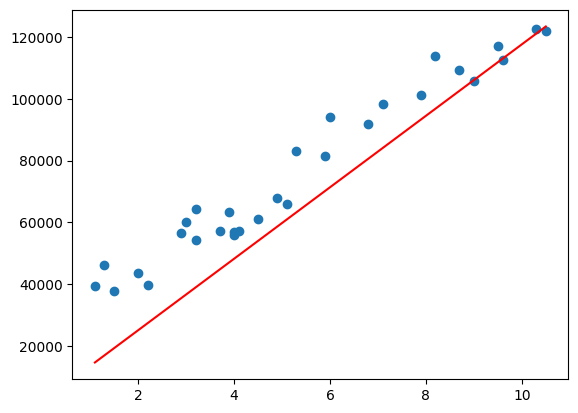

In [14]:
plt.scatter(salary_df['YearsExperience'], salary_df['Salary'])
plt.plot(salary_df['YearsExperience'], m*salary_df['YearsExperience']+c, 'r-')